# A deep dive into Elon Musk's tweets about Bitcoin

### One visual perspective

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
df = pd.read_csv('../data/bitcoin_tweets.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(3)

,date,tweet,tweet_clean_func,tweet_emojis,tweet_clean,hashtag,vader_clean_scores,vader_clean_compound,vader_negative,vader_positive,vader_neutral,vader_clean_sentiment,vader_clean_polarity,blob_polarity,blob_subjectivity,blob_sentiment,sentiment_flair,probability_flair,classified_similarly
0,2018-10-23,@vicentes @Grimezsz Wanna buy some Bitcoin? 😉😉...,"['wanna', 'buy', 'some', 'bitcoin']",['😉😉'],wanna buy bitcoin,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,neutral,NaN,0.0,0.0,neutral,NEGATIVE,0.996796,1
1,2020-01-10,Bitcoin is *not* my safe word,"['bitcoin', 'is', 'not', 'my', 'safe', 'word']",[],bitcoin safe word,[],"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",0.4404,0.0,0.592,0.408,positive,1.0,0.5,0.5,positive,POSITIVE,0.990531,1
2,2020-05-02,@Bitcoin How much for some anime Bitcoin? htt...,"['how', 'much', 'for', 'some', 'anime', 'bitco...",[],much anime bitcoin,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,neutral,NaN,0.2,0.2,positive,NEGATIVE,0.883882,0


#### Create a mask for wordcloud 

In [4]:
import numpy as np
from PIL import Image
mask = np.array(Image.open('btc.png'))

### Create a wordcloud with TF-IDF

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
response = vectorizer.fit_transform(df["tweet_clean"])

df_tfidf_sklearn = pd.DataFrame(response.toarray(),columns=vectorizer.get_feature_names())
df_tfidf_sklearn

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,acquired,action,actually,adventurous,advice,aka,allowing,almost,alternative,although,...,wanna,wear,witcher,without,wont,word,wouldnt,ww,xinjiang,year
0,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.731076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.656880,0.000000,0.00000,0.000000,0.000000
2,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.270315,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
5,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.570012,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
6,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.550199,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
7,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.656880,0.000000,0.00000,0.000000,0.000000
8,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.304102,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.164204,0.201956,0.00000,0.000000,0.000000
9,0.000000,0.27514,0.000000,0.27514,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


In [6]:
tf_idf_counter = df_tfidf_sklearn.T.sum(axis=1)

In [7]:
wordcloud = WordCloud(width = 3000, height = 2000,background_color='white', colormap='Pastel1')
wordcloud.generate_from_frequencies(tf_idf_counter)

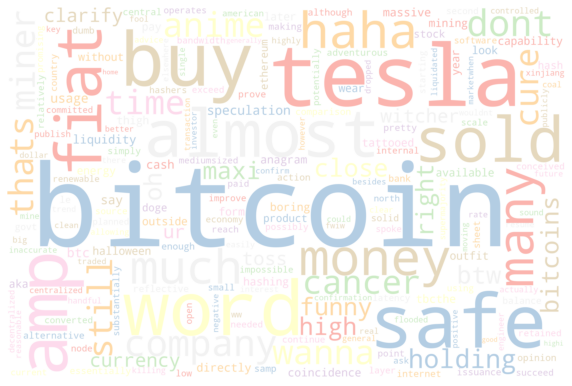

In [8]:
plt.figure(figsize=(10, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

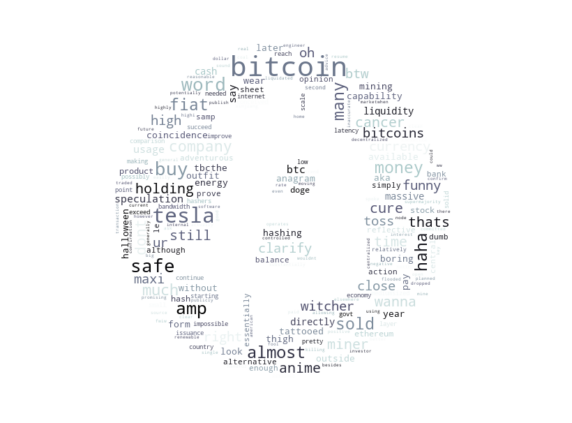

In [16]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1,background_color='white', 
                      colormap='bone', contour_color = '#374259',
                      collocations=False, stopwords = STOPWORDS, mask=mask).generate_from_frequencies(tf_idf_counter)

plt.figure(figsize=(10, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

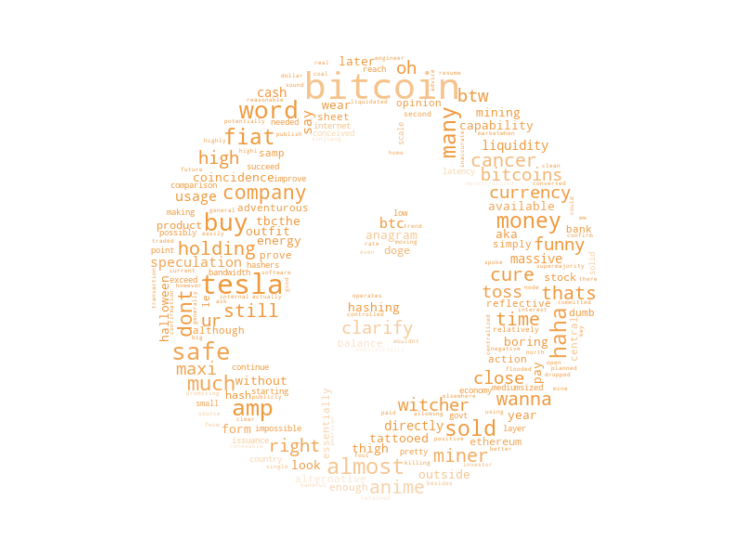

In [17]:
import numpy as np
from PIL import Image
mask = np.array(Image.open('btc.png'))

# Generate a word cloud image

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1,
                      background_color='white', mode="RGBA", 
                      collocations=False, stopwords = STOPWORDS, mask=mask).generate_from_frequencies(tf_idf_counter)

# create coloring from image
image_colors = ImageColorGenerator(mask)

plt.figure(figsize=[15,10])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("bitcoin_wordcloud.png", format="png")

plt.show()

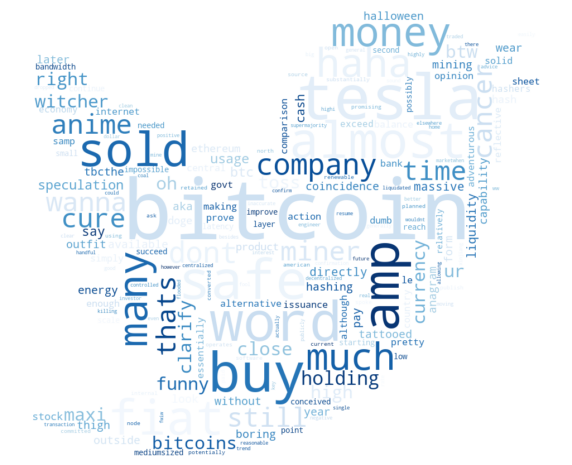

In [22]:
mask = np.array(Image.open('twitter_mask.png'))
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1,background_color='white', 
                      colormap='Blues_r', contour_color = '#374259',
                      collocations=False, stopwords = STOPWORDS, mask=mask).generate_from_frequencies(tf_idf_counter)

plt.figure(figsize=(10, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

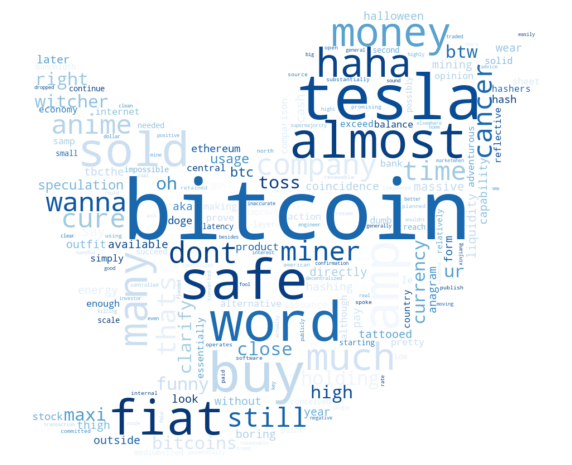

In [24]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1,background_color='white', 
                      colormap='Blues', contour_color = '#374259',
                      collocations=False, stopwords = STOPWORDS, mask=mask).generate_from_frequencies(tf_idf_counter)

plt.figure(figsize=(10, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.savefig("bitcoin_wordcloud_2.png", format="png")

plt.show()